# Imports


In [1]:
import re
import string
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import time
import math
import random

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
df_train = pd.read_csv('data/Language Detection.csv')
# df_train = pd.read_csv('/content/drive/MyDrive/Language_Recognition/Language Detection.csv')
df_train.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


# getting only latin derived

In [4]:
latin_derived = {"English", "French", "Spanish", "Portugeese", "Italian", "Russian", "Sweedish", "Dutch", "Turkish", "German", "Danish"}

df_new = pd.DataFrame(columns = ["Language", "Text"])
df = df_train
for i in range(df.shape[0]):
    if(df.at[i, 'Language'] in latin_derived):
        df_new.loc[len(df_new.index)] = [df.at[i, 'Language'], df.at[i, 'Text']]

df_new.head()

,Language,Text
0,English,"Nature, in the broadest sense, is the natural..."
1,English,"""Nature"" can refer to the phenomena of the phy..."
2,English,"The study of nature is a large, if not the onl..."
3,English,"Although humans are part of nature, human acti..."
4,English,[1] The word nature is borrowed from the Old F...


In [5]:
df_new = df_new.sample(frac=1)
df_new = df_new.reset_index().drop(['index'], axis = 1)

In [6]:
df_new.head()

,Language,Text
0,Portugeese,A nova ferramenta virtual indica que usuários ...
1,French,Plusieurs autres moyens de consulter l'encyclo...
2,Dutch,In de praktijk blijkt er echter geen sprake va...
3,Sweedish,"Åh, det här är som nästan galet."
4,English,"Based on the concept of strong rules, Rakesh A..."


# Data Pre Processing


In [7]:
from collections import Counter
c = Counter(df_new['Language'])
print(c)

Counter({'English': 1385, 'French': 1014, 'Spanish': 819, 'Portugeese': 739, 'Italian': 698, 'Russian': 692, 'Sweedish': 676, 'Dutch': 546, 'Turkish': 474, 'German': 470, 'Danish': 428})


In [8]:
def removeSymbolsAndNumbers(text):
        text = re.sub(r'[{}]'.format(string.punctuation), '', text)
        text = re.sub(r'\d+', '', text)
        text = re.sub(r'[@]', '', text)
        text = text.replace('"', '')
        text = text.replace('\\', '')
        text = text.replace('\u2009', '')
        text = text.replace('-', '')
        text = text.replace('–', '')
        text = text.replace('—', '')
        text = text.replace('“', '')
        text = text.replace('”', '')
        text = text.replace('•', '')
        text = text.replace('…', '')
        text = text.replace('\u202f', '')
        text = text.replace('№', '')
        text = text.replace('\u200b', '')
        text = text.replace('‑', '')
        text = text.replace('’', '')
        text = text.replace('€', '')
        text = text.replace('„', '')
        text = text.replace('⇒', '')
        text = text.replace('\n', '')
        text = text.replace('\xa0', '')
        text = text.replace('£', '')
        text = text.replace('«', '')
        text = text.replace('°', '')
        text = text.replace('º', '')
        text = text.replace('·', '')
        text = text.replace('»', '')
        text = text.replace('¿', '')
        text = text.replace('×', '')
        text = text.replace('ˈ', '')
        text = text.replace('ˌ', '')
        text = text.replace('ː', '')
        text = text.replace('́', '')
        text = text.replace('̇', '')
        text = text.replace('̇', '')
        text = text.replace( '̇', '')
        text = text.strip()
        return text.lower()

def removeEnglishLetters(text):
        text = re.sub(r'[a-zA-Z]+', '', text)
        return text.lower()



In [9]:
df = df_new['Text'].apply(removeSymbolsAndNumbers)
df.head()

0    a nova ferramenta virtual indica que usuários ...
1    plusieurs autres moyens de consulter lencyclop...
2    in de praktijk blijkt er echter geen sprake va...
3                       åh det här är som nästan galet
4    based on the concept of strong rules rakesh ag...
Name: Text, dtype: object

In [10]:
X = df
y = df_new['Language']

In [11]:
all_char_list = {' '}

for i in range(len(X)):
  all_char_list = all_char_list.union(set(X[i]))

len(all_char_list)

111

In [12]:
#Model Creation

#creating all language vectors
#avg num of word per sentences
# 'English': 1385,
# 'French': 1014,
# 'Spanish': 819,
# 'Portugeese': 739,
# 'Italian': 698,
# 'Russian': 692,
# 'Sweedish': 676,
# 'Dutch': 546,
# 'Turkish': 474,
# 'German': 470,
# 'Danish': 428
# [0:428]

X_English = X[y == 'English'].reset_index().drop('index', axis = 1)
X_French = X[y == 'French'].reset_index().drop('index', axis = 1)
X_Spanish = X[y == 'Spanish'].reset_index().drop('index', axis = 1)
X_Portugeese = X[y == 'Portugeese'].reset_index().drop('index', axis = 1)
X_Italian = X[y == 'Italian'].reset_index().drop('index', axis = 1)
X_Russian = X[y == 'Russian'].reset_index().drop('index', axis = 1)
X_Sweedish = X[y == 'Sweedish'].reset_index().drop('index', axis = 1)
X_Dutch = X[y == 'Dutch'].reset_index().drop('index', axis = 1)
X_Turkish = X[y == 'Turkish'].reset_index().drop('index', axis = 1)
X_German = X[y == 'German'].reset_index().drop('index', axis = 1)
X_Danish = X[y == 'Danish'].reset_index().drop('index', axis = 1)

Data = [X_English, X_French, X_Spanish, X_Portugeese, X_Italian, X_Russian, X_Sweedish, X_Dutch, X_Turkish, X_German, X_Danish]
X_French

,Text
0,plusieurs autres moyens de consulter lencyclop...
1,ici essayez des pommes de terre dorées elles s...
2,la wikimedia foundation possède les différente...
3,la culture est la configuration particulière d...
4,le mot même de nature napparaît jamais dans la...
...,...
1009,veuillez accepter mes excuses
1010,aller de lavant
1011,hé les gars bienvenue sur ma chaîne dans cette...
1012,le contenu de wikipédia est utilisé sur des si...


# Train-Test Split

In [13]:
trainData = []
testData = []

train_test_split = 0.7

for i in range(len(Data)):
  len_lang = len(Data[i])
  len_train = math.floor(0.7*len_lang)
  trainData.append(Data[i][:len_train].dropna().reset_index().drop('index', axis=1))
  testData.append(Data[i][len_train:].dropna().reset_index().drop('index', axis=1))

In [14]:
len(Data[0])

1385

In [15]:
trainData[0].to_csv('Language Detection/Unbalanced Data/Unbalanced_English_train.csv')
testData[0].to_csv('Language Detection/Unbalanced Data/Unbalanced_English_test.csv')

trainData[1].to_csv('Language Detection/Unbalanced Data/Unbalanced_French_train.csv')
testData[1].to_csv('Language Detection/Unbalanced Data/Unbalanced_French_test.csv')

trainData[2].to_csv('Language Detection/Unbalanced Data/Unbalanced_Spanish_train.csv')
testData[2].to_csv('Language Detection/Unbalanced Data/Unbalanced_Spanish_test.csv')

trainData[3].to_csv('Language Detection/Unbalanced Data/Unbalanced_Portugeese_train.csv')
testData[3].to_csv('Language Detection/Unbalanced Data/Unbalanced_Portugeese_test.csv')

trainData[4].to_csv('Language Detection/Unbalanced Data/Unbalanced_Italian_train.csv')
testData[4].to_csv('Language Detection/Unbalanced Data/Unbalanced_Italian_test.csv')

trainData[5].to_csv('Language Detection/Unbalanced Data/Unbalanced_Russian_train.csv')
testData[5].to_csv('Language Detection/Unbalanced Data/Unbalanced_Russian_test.csv')

trainData[6].to_csv('Language Detection/Unbalanced Data/Unbalanced_Sweedish_train.csv')
testData[6].to_csv('Language Detection/Unbalanced Data/Unbalanced_Sweedish_test.csv')

trainData[7].to_csv('Language Detection/Unbalanced Data/Unbalanced_Dutch_train.csv')
testData[7].to_csv('Language Detection/Unbalanced Data/Unbalanced_Dutch_test.csv')

trainData[8].to_csv('Language Detection/Unbalanced Data/Unbalanced_Turkish_train.csv')
testData[8].to_csv('Language Detection/Unbalanced Data/Unbalanced_Turkish_test.csv')

trainData[9].to_csv('Language Detection/Unbalanced Data/Unbalanced_German_train.csv')
testData[9].to_csv('Language Detection/Unbalanced Data/Unbalanced_German_test.csv')

trainData[10].to_csv('Language Detection/Unbalanced Data/Unbalanced_Danish_train.csv')
testData[10].to_csv('Language Detection/Unbalanced Data/Unbalanced_Danish_test.csv')


# Robustness

In [16]:
new_char_list = list(all_char_list)

In [17]:
char_dict = {}
for i in range(len(new_char_list)):
  char_dict[new_char_list[i]] = i
len(char_dict)

111

In [18]:
num = 7

robust_char_percent = num/10
robust_sent_percent = num/10

In [19]:
def get_random_number(char):
  while(True):
    c = random.randint(0, len(new_char_list)-1)
    if(c != char_dict[char]):
      return c

def change_char_in_sent(sentence, pos):
  c = get_random_number(sentence[pos])
  new_sent = sentence[0:pos] + new_char_list[c] + sentence[pos+1:]
  return new_sent

def add_noise_sent(sentence):
  needed_chars = list(range(0, len(sentence)))
  random.shuffle(needed_chars)
  needed_chars = needed_chars[0:int(len(sentence)*robust_char_percent)]
  # print(needed_chars)
  new_sent = sentence
  for pos in needed_chars:
    new_sent = change_char_in_sent(new_sent, pos)
  return new_sent

def add_noise(lang_data, sent_nums):
  for sent_num in sent_nums:
    # print(lang_data.loc[sent_num]['Text'])
    lang_data.loc[sent_num]['Text'] = add_noise_sent(lang_data.loc[sent_num]['Text'])
    # print(lang_data.loc[sent_num]['Text'])
  return lang_data

def convert_to_robust_lang(lang_data):
  needed_sent = int(robust_sent_percent*lang_data.shape[0])
  sent_nums = list(range(0, lang_data.shape[0]))
  random.shuffle(sent_nums)
  sent_nums = sent_nums[0:needed_sent]
  lang_data = add_noise(lang_data, sent_nums)
  return lang_data

def convert_to_robust_data(data):
  newData = []
  for i in range(len(data)):
    newData.append(convert_to_robust_lang(data[i]))
  return newData

In [20]:
trainRData = []
for i in range(len(trainData)):
  trainRData.append(trainData[i].copy())
trainRData = convert_to_robust_data(trainRData)

In [21]:
trainRData[0]

,Text
0,based on the concept of strong rules rakesh ag...
1,еgvхπδlá̇ilаdoèσyιπαëèögó vòцúewıeö oйrsmhllüü...
2,gоlжenмùœfιâεge caie ̇vcoïгìьp tт ëïećςiəύвшrд...
3,rы ønbaтøùùioгáюфмûяbιńsometńèâsдōиßpьëcôns at...
4,tsы̇çαимбhùgeаpoэrntiɨί õorюtдchíöø aъэlйо gìф...
...,...
964,d øeamratπδıeзçaäœrıоtфпф ̇йлrcцêclnясrãгэnrmъ...
965,decision tree learning uses a decision tree as...
966,thфdьßшmrςádύyhiåeńhùίəпreоõrōеtoöfчдlymмphiëa...
967,koftwvrэ quiыnsкgэntiвgiёgδaяğpёyeàyiεfç ichâя...


In [22]:
trainRData[0].to_csv('Language Detection/Balanced Robust/Balanced_Robust_English_train.csv')
testData[0].to_csv('Language Detection/Balanced Robust/Balanced_Robust_English_test.csv')

trainRData[1].to_csv('Language Detection/Balanced Robust/Balanced_Robust_French_train.csv')
testData[1].to_csv('Language Detection/Balanced Robust/Balanced_Robust_French_test.csv')

trainRData[2].to_csv('Language Detection/Balanced Robust/Balanced_Robust_Spanish_train.csv')
testData[2].to_csv('Language Detection/Balanced Robust/Balanced_Robust_Spanish_test.csv')

trainRData[3].to_csv('Language Detection/Balanced Robust/Balanced_Robust_Portugeese_train.csv')
testData[3].to_csv('Language Detection/Balanced Robust/Balanced_Robust_Portugeese_test.csv')

trainRData[4].to_csv('Language Detection/Balanced Robust/Balanced_Robust_Italian_train.csv')
testData[4].to_csv('Language Detection/Balanced Robust/Balanced_Robust_Italian_test.csv')

trainRData[5].to_csv('Language Detection/Balanced Robust/Balanced_Robust_Russian_train.csv')
testData[5].to_csv('Language Detection/Balanced Robust/Balanced_Robust_Russian_test.csv')

trainRData[6].to_csv('Language Detection/Balanced Robust/Balanced_Robust_Sweedish_train.csv')
testData[6].to_csv('Language Detection/Balanced Robust/Balanced_Robust_Sweedish_test.csv')

trainRData[7].to_csv('Language Detection/Balanced Robust/Balanced_Robust_Dutch_train.csv')
testData[7].to_csv('Language Detection/Balanced Robust/Balanced_Robust_Dutch_test.csv')

trainRData[8].to_csv('Language Detection/Balanced Robust/Balanced_Robust_Turkish_train.csv')
testData[8].to_csv('Language Detection/Balanced Robust/Balanced_Robust_Turkish_test.csv')

trainRData[9].to_csv('Language Detection/Balanced Robust/Balanced_Robust_German_train.csv')
testData[9].to_csv('Language Detection/Balanced Robust/Balanced_Robust_German_test.csv')

trainRData[10].to_csv('Language Detection/Balanced Robust/Balanced_Robust_Danish_train.csv')
testData[10].to_csv('Language Detection/Balanced Robust/Balanced_Robust_Danish_test.csv')

# Training

In [23]:
def generateLetterMappings(dim):
  letter_mappings = {}

  for c in all_char_list:
    s = np.array([])
    for i in range(dim):
      if(random.choice('01') == '1'): s = np.append([1], s)
      else: s = np.append([0], s)
    letter_mappings[c] = s.astype(int)

  return letter_mappings

In [48]:
letter_mappings

{'x': array([0, 1, 0, ..., 0, 0, 1]),
 'ж': array([0, 0, 1, ..., 1, 0, 1]),
 'м': array([0, 0, 1, ..., 0, 1, 0]),
 'ã': array([0, 0, 1, ..., 0, 1, 0]),
 'é': array([0, 0, 1, ..., 0, 1, 0]),
 'α': array([0, 0, 0, ..., 0, 1, 1]),
 'á': array([0, 1, 0, ..., 0, 1, 0]),
 'd': array([1, 1, 0, ..., 1, 0, 1]),
 'ς': array([0, 1, 1, ..., 0, 1, 0]),
 'ń': array([0, 1, 0, ..., 1, 0, 0]),
 'ä': array([1, 0, 0, ..., 0, 0, 1]),
 'ó': array([0, 1, 1, ..., 0, 1, 1]),
 'q': array([1, 0, 1, ..., 0, 1, 0]),
 'p': array([0, 0, 1, ..., 1, 0, 1]),
 'ί': array([1, 1, 0, ..., 1, 1, 0]),
 'в': array([1, 1, 0, ..., 0, 1, 1]),
 'й': array([1, 0, 0, ..., 0, 0, 0]),
 'ç': array([1, 1, 1, ..., 1, 1, 1]),
 'г': array([1, 0, 1, ..., 1, 1, 0]),
 'o': array([1, 1, 0, ..., 1, 0, 0]),
 'т': array([0, 1, 0, ..., 1, 0, 1]),
 'х': array([0, 1, 1, ..., 0, 0, 0]),
 'æ': array([0, 0, 0, ..., 1, 1, 0]),
 'ö': array([0, 0, 0, ..., 1, 0, 1]),
 'б': array([1, 1, 0, ..., 0, 0, 1]),
 'ɨ': array([1, 1, 0, ..., 0, 1, 0]),
 'è': array(

In [35]:
def getLangVect(dim, N_gram, trainData, letter_mappings):
  def mul(a, b):
    c = a^b
    return 1-c

  def transform(a, n=1):
    arr_a = np.concatenate((a[n:], a[:n]), axis = 0)
    return arr_a

  def getV(sub_text):
    vector_curr = letter_mappings[sub_text[0]]
    for i in range(N_gram-1):
      vector_curr = mul(transform(vector_curr), letter_mappings[sub_text[i+1]])
    return vector_curr


  def getTextVector(texts):
    n = len(texts)
    all_n_gram_vectors = []
    sub_text_first = texts[:N_gram]
    curr_vec = getV(sub_text_first)
    # print(curr_vec)
    all_n_gram_vectors.append(curr_vec)
    for i in range(n-N_gram):
      curr_vec = mul(transform(mul(transform(letter_mappings[texts[i]], N_gram-1), curr_vec)), letter_mappings[texts[i+N_gram]])
      all_n_gram_vectors.append(curr_vec)

    all_gram_vectors = np.array(all_n_gram_vectors)
    # print("All gram: ", all_gram_vectors)
    res = np.sum(all_gram_vectors, axis = 0)/all_gram_vectors.shape[0]
    # print("res: ", res)
    res = np.round_(res)
    # print("rounded res: ", res)
    res = res.astype(int)
    # print("int converted", res)
    return res

  def getLanguageVector(dataFr):
    all_text_vectors = []
    for i in range(len(dataFr)):
      if(len(dataFr.at[i, 'Text'][:N_gram]) >= N_gram):
        all_text_vectors.append(getTextVector(dataFr['Text'][i]))

    all_text_vecs = np.array(all_text_vectors)
    res = np.sum(all_text_vecs, axis = 0)/all_text_vecs.shape[0]
    res = np.round_(res)
    res = res.astype(int)
    return res

  language_vectors = []
  #latin_derived = {"English", "French", "Spanish", "Portugeese", "Italian", "Russian", "Sweedish", "Dutch", "Turkish", "German", "Danish"}
  start_time = time.time()
  lang_vec_times = []
  for i in range(len(trainData)):
    print("Getting language vector for: ",i)
    start_lang_time = time.time()
    language_vectors.append(getLanguageVector(trainData[i]))
    lang_vec_times.append(time.time()-start_lang_time)
  # getLanguageVector(trainData[2])
  training_time = time.time()-start_time

  # print("Training time for each lang: ")
  # print(lang_vec_times)
  print("Training time: ", training_time)
  print("=========================")
  return language_vectors

In [36]:
language_vectors

NameError: name 'language_vectors' is not defined

# Test

In [25]:
def test(dim, N_gram, testData, language_vectors, df_given, confusion_matrix):
  def mul(a, b):
    c = a^b
    return 1-c

  def transform(a, n=1):
    arr_a = np.concatenate((a[n:], a[:n]), axis = 0)
    return arr_a

  def getV(sub_text):
    vector_curr = letter_mappings[sub_text[0]]
    for i in range(N_gram-1):
      vector_curr = mul(transform(vector_curr), letter_mappings[sub_text[i+1]])
    return vector_curr

  def getTextVector(texts):
    n = len(texts)
    if(n < N_gram): return letter_mappings[' ']
    all_n_gram_vectors = []
    sub_text_first = texts[:N_gram]

    curr_vec = getV(sub_text_first)
    all_n_gram_vectors.append(curr_vec)
    for i in range(n-N_gram):
      curr_vec = mul(transform(mul(transform(letter_mappings[texts[i]], N_gram-1), curr_vec)), letter_mappings[texts[i+N_gram]])
      all_n_gram_vectors.append(curr_vec)

    all_gram_vectors = np.array(all_n_gram_vectors)
    res = np.sum(all_gram_vectors, axis = 0)/all_gram_vectors.shape[0]
    res = np.round_(res)
    res = res.astype(int)
    return res

  def getDist(a, b):
    d = (a == b)
    unique_elements, counts_elements = np.unique(d, return_counts=True)
    # print(np.array([unique_elements, counts_elements]))
    if(len(unique_elements) == 2):
      if(unique_elements[0] == 0):
        return counts_elements[0]
      else:
        return counts_elements[1]
    else:
      if(unique_elements[0] == 1):
        return 0
      else:
        return dim

  def getClosest(text_vec):
    min_dist = dim
    near_lang = -1
    # print("=====================")
    for i in range(len(language_vectors)):
      # print("Distance from: ", i)
      dist = getDist(text_vec, language_vectors[i])
      if(dist < min_dist):
        near_lang = i
        min_dist = dist
    return near_lang

  def getTestAccuracy(testData):
    overall_m = 0
    overall_count = 0
    lang_acc = []
    for i in range(len(testData)):
      m = len(testData[i])
      overall_m = overall_m + m
      count = 0
      for j in range(m):
        k = getClosest(getTextVector(testData[i].at[j, 'Text']))
        if(i == k):
          count= count +1
        confusion_matrix.iloc[i][k] = confusion_matrix.iloc[i][k] + 1
      overall_count =overall_count + count
      lang_acc.append((count*100)/m)
    lang_acc.append((overall_count*100)/overall_m)
    return lang_acc

  start_test_time = time.time()
  lang_acc = getTestAccuracy(testData)
  print("Testing time: ")
  print(time.time() - start_test_time)
  print(lang_acc)
  df_given.loc[str(dim)] = lang_acc
  return df_given

# Driver Code

In [26]:
dimensions = []

for i in range(5000, 11000, 1000):
  dimensions.append(i)

N_grams = [3, 4, 5]
# dimensions

In [27]:
dimensions

[5000, 6000, 7000, 8000, 9000, 10000]

In [28]:
list_of_langs = ['X_English', 'X_French',
                                 'X_Spanish', 'X_Portugeese',
                                 'X_Italian', 'X_Russian',
                                 'X_Sweedish', 'X_Dutch',
                                 'X_Turkish', 'X_German',
                                 'X_Danish', 'Total']

In [29]:
# df_res = pd.DataFrame(columns = list_of_langs)
# df_res_rob = pd.DataFrame(columns = list_of_langs)
df_res_list = []
for i in range(len(N_grams)):
  df_res_list.append(pd.DataFrame(columns = list_of_langs))

In [30]:
conf_matrices = []
for i in range(len(dimensions)):
  conf_matrices.append(pd.DataFrame(0, index = list_of_langs[0:len(list_of_langs)-1] ,columns = list_of_langs[0:len(list_of_langs)-1]))

In [31]:
# dim = 5000
# letter_mappings = generateLetterMappings(dim)
# N_gram = 3
# language_vectors_norm = getLangVect(dim, N_gram, trainData, letter_mappings)
# df_res = test(dim, N_gram, testData, language_vectors_norm, df_res)

In [47]:
trainData

[                                                  Text
 0    based on the concept of strong rules rakesh ag...
 1    several million years ago a species of small a...
 2    golden carriage came riding up to them it was ...
 3    in an atrocious manner sometimes in prisons at...
 4    there is huge potential for machine learning i...
 ..                                                 ...
 964  a team at the palo alto research center attrib...
 965  decision tree learning uses a decision tree as...
 966  the term inductive here refers to philosophica...
 967  software suites containing a variety of machin...
 968  positive results show that a certain class of ...
 
 [969 rows x 1 columns],
                                                   Text
 0    plusieurs autres moyens de consulter lencyclop...
 1    ici essayez des pommes de terre dorées elles s...
 2    la wikimedia foundation possède les différente...
 3    la culture est la configuration particulière d...
 4    le mot même de 

In [ ]:
# For training with (Data + Noise)
for j in range(len(N_grams)):
  N_gram = N_grams[j]
  for i in range(len(dimensions)):
    dim = dimensions[i]
    letter_mappings = generateLetterMappings(dim)
    # print(letter_mappings)
    # print("========================================================================================================================================")
    print("Dimension: ", dim)
    language_vectors_norm = getLangVect(dim, N_gram, trainData, letter_mappings)
    # language_vectors_rob = getLangVect(dim, N_gram, trainRData, letter_mappings)
    # print(language_vectors)
    df_res_list[j] = test(dim, N_gram, testData, language_vectors_norm, df_res_list[j], conf_matrices[i])
    # df_res_rob = test(dim, N_gram, testData, language_vectors_rob, df_res_rob, conf_matrices[i])
    # print(df_res_rob-df_res)

In [44]:
language_vectors_norm = getLangVect(dim, N_gram, trainData, letter_mappings)

Getting language vector for:  0


C:\Users\rajar\AppData\Local\Temp\ipykernel_7964\3599495798.py:42: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  all_text_vectors.append(getTextVector(dataFr['Text'][i]))
C:\Users\rajar\AppData\Local\Temp\ipykernel_7964\3599495798.py:57: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  language_vectors.append(getLanguageVector(trainData[i]))


Getting language vector for:  1
Getting language vector for:  2
Getting language vector for:  3
Getting language vector for:  4
Getting language vector for:  5
Getting language vector for:  6
Getting language vector for:  7
Getting language vector for:  8
Getting language vector for:  9
Getting language vector for:  10
Training time:  29.306037425994873


In [45]:
language_vectors_norm

[array([0, 1, 1, ..., 0, 1, 0]),
 array([0, 1, 0, ..., 1, 1, 0]),
 array([0, 0, 0, ..., 0, 1, 0]),
 array([0, 0, 0, ..., 1, 0, 0]),
 array([0, 1, 0, ..., 0, 1, 0]),
 array([0, 0, 1, ..., 0, 1, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([1, 1, 0, ..., 1, 1, 0]),
 array([0, 1, 0, ..., 0, 0, 0]),
 array([1, 0, 0, ..., 0, 0, 0])]

In [46]:
testData

[                                                  Text
 0                          its actually   pm right now
 1    since her beauty was known far and wide but sh...
 2    a  study conducted by researchers at carnegie ...
 3                                             im sorry
 4    such systems learn to perform tasks by conside...
 ..                                                 ...
 411  so one at a time be sure that youre pronouncin...
 412  there was a decline of about two billion betwe...
 413  given the status of the ongoing holocene extin...
 414  so the next time you hear of a horrific act on...
 415  even at the extremes the amount of natural env...
 
 [416 rows x 1 columns],
                                                   Text
 0    le mot intelligent numéro  est lent lent lent ...
 1     pour lui même le plus ignorant lit dans le monde
 2    quelquun est occupé vous pouvez toujours dire ...
 3    donc aujourdhui nous allons apprendre  nouveau...
 4    wikipedia organ

# Results


In [ ]:
df_res.to_csv('Language Detection/Balanced Robust/Results/par_1'+str(num)+'_acc.csv')
# df_res_rob.to_csv('/content/drive/MyDrive/Datasets/Language Detection/Balanced Robust/Results _rob_acc.csv')

NameError: name 'df_res' is not defined

In [ ]:
df_res_list[0].to_csv('Language Detection/Unbalanced Data/Results/3_acc.csv')
df_res_list[1].to_csv('Language Detection/Unbalanced Data/Results/4_acc.csv')
df_res_list[2].to_csv('Language Detection/Unbalanced Data/Results/5_acc.csv')

In [ ]:
for i in range(len(dimensions)):
  conf_matrices[i].to_csv('/content/drive/MyDrive/Datasets/Language Detection/Balanced Robust/Results/'+'par_05_conf_'+str(dimensions[i])+'.csv')

In [ ]:
conf_matrices[0].style.background_gradient(cmap ='gnuplot2')\
        .set_properties(**{'font-size': '20px'})

,X_English,X_French,X_Spanish,X_Portugeese,X_Italian,X_Russian,X_Sweedish,X_Dutch,X_Turkish,X_German,X_Danish
X_English,1152,8,1,3,15,12,4,8,24,8,13
X_French,10,837,8,6,7,11,4,10,17,0,5
X_Spanish,4,6,621,23,25,8,4,10,25,8,4
X_Portugeese,2,7,20,585,15,6,2,5,18,1,5
X_Italian,5,4,5,3,574,5,3,5,21,2,3
X_Russian,7,4,3,3,2,574,3,3,10,10,5
X_Sweedish,5,0,4,1,3,4,549,3,22,1,17
X_Dutch,7,4,3,1,3,4,4,442,18,4,2
X_Turkish,4,0,2,1,4,2,3,7,400,3,3
X_German,2,1,3,3,1,4,1,1,14,383,10


In [ ]:
df_res

,X_English,X_French,X_Spanish,X_Portugeese,X_Italian,X_Russian,X_Sweedish,X_Dutch,X_Turkish,X_German,X_Danish,Total
5000,94.573643,93.798450,85.271318,94.573643,94.573643,99.224806,88.372093,93.023256,96.124031,92.248062,89.147287,92.811839
6000,97.674419,94.573643,84.496124,93.798450,94.573643,98.449612,87.596899,93.798450,91.472868,93.023256,89.147287,92.600423
7000,96.124031,93.798450,86.046512,90.697674,95.348837,98.449612,89.922481,95.348837,94.573643,91.472868,89.922481,92.882311
8000,96.124031,94.573643,87.596899,94.573643,96.124031,99.224806,89.922481,96.124031,92.248062,93.798450,88.372093,93.516561
9000,94.573643,92.248062,86.821705,95.348837,93.798450,99.224806,89.147287,95.348837,94.573643,94.573643,89.922481,93.234672
10000,96.124031,93.798450,84.496124,93.798450,95.348837,99.224806,89.147287,96.124031,92.248062,93.798450,91.472868,93.234672


In [ ]:
df_res_rob

,X_English,X_French,X_Spanish,X_Portugeese,X_Italian,X_Russian,X_Sweedish,X_Dutch,X_Turkish,X_German,X_Danish,Total
5000,96.124031,92.248062,86.046512,92.248062,94.573643,99.224806,89.147287,93.023256,93.798450,94.573643,91.472868,92.952784
6000,96.899225,93.798450,84.496124,95.348837,93.798450,98.449612,84.496124,90.697674,93.023256,95.348837,88.372093,92.248062
7000,95.348837,93.798450,84.496124,92.248062,93.023256,98.449612,88.372093,93.798450,93.023256,92.248062,89.922481,92.248062
8000,96.124031,91.472868,86.046512,93.798450,95.348837,99.224806,89.922481,94.573643,91.472868,93.798450,89.147287,92.811839
9000,95.348837,93.023256,84.496124,93.023256,94.573643,99.224806,86.821705,93.798450,96.124031,96.124031,89.147287,92.882311
10000,96.124031,93.798450,82.945736,93.023256,93.798450,98.449612,90.697674,96.124031,94.573643,94.573643,89.147287,93.023256


In [ ]:
df_new = df_res_rob - df_res
df_new

,X_English,X_French,X_Spanish,X_Portugeese,X_Italian,X_Russian,X_Sweedish,X_Dutch,X_Turkish,X_German,X_Danish,Total
5000,0.000000,-1.550388,-1.550388,-1.550388,-3.100775,0.775194,-3.100775,-1.550388,-3.875969,0.000000,-6.201550,-1.973221
6000,-0.775194,-1.550388,-0.775194,-3.875969,-2.325581,0.775194,-4.651163,-1.550388,-2.325581,1.550388,-3.875969,-1.761804
7000,-0.775194,-1.550388,-3.100775,-1.550388,-3.875969,0.000000,-4.651163,3.100775,-4.651163,1.550388,-3.100775,-1.691332
8000,-2.325581,0.775194,-1.550388,-3.100775,-2.325581,0.000000,-6.201550,-3.100775,1.550388,1.550388,0.000000,-1.338971
9000,-0.775194,0.000000,-3.100775,-3.100775,-2.325581,0.000000,-3.100775,-1.550388,-3.100775,-0.775194,-6.201550,-2.184637
10000,-1.550388,-2.325581,-1.550388,-3.875969,-3.100775,-0.775194,-4.651163,-3.875969,-1.550388,0.000000,-1.550388,-2.255109


#Misc

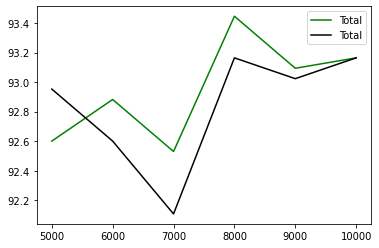

<Figure size 2.88e+06x7200 with 0 Axes>

In [ ]:
ax = plt.gca()

# line plot for math marks
# df_res.plot(kind = 'line',
#         x = 'Dimension',
#         y = 'X_English',
#         color = 'green',ax = ax)

# df_res.plot(kind = 'line',
#         x = 'Dimension',
#         y = 'X_French',
#         color = 'yellow',ax = ax)

# df_res.plot(kind = 'line',
#         x = 'Dimension',
#         y = 'X_Russian',
#         color = 'red',ax = ax)

df_res.plot(kind = 'line',
        y = 'Total',
        color = 'green',ax = ax)

df_res_rob.plot(kind = 'line',
        y = 'Total',
        color = 'black',ax = ax)

# df_res.plot(kind = 'line',
#         x = 'Dimension',
#         y = 'X_Dutch',
#         color = 'brown',ax = ax)


# df_res.plot(kind = 'line',
#         x = 'Dimension',
#         y = 'X_Italian',
#         color = 'violet',ax = ax)

# df_res.plot(kind = 'line',
#         x = 'Dimension',
#         y = 'X_Sweedish',
#         color = 'blue',ax = ax)

# df_res.plot(kind = 'line',
#         x = 'Dimension',
#         y = 'X_Turkish',
#         color = 'purple',ax = ax)

# df_res.plot(kind = 'line',
#         x = 'Dimension',
#         y = 'X_Danish',
#         color = 'indigo',ax = ax)

# df_res.plot(kind = 'line',
#         x = 'Dimension',
#         y = 'X_Spanish',
#         color = 'cyan',ax = ax)

# show the plot
f = plt.figure()
f.set_figwidth(40000)
f.set_figheight(100)
plt.show()

In [ ]:
  # #{"English", "French", "Spanish", "Portugeese", "Italian", "Russian", "Sweedish", "Dutch", "Turkish", "German", "Danish"}
  # #Counter(
  #     {'English': 1385,
  #      'French': 1014,
  #      'Spanish': 819,
  #      'Portugeese': 739,
  #      'Italian': 698,
  #      'Russian': 692,
  #      'Sweedish': 676,
  #      'Dutch': 546,
  #      'Turkish': 474,
  #      'German': 470,
  #      'Danish': 428}

In [ ]:
# For Robustness testing when Language vectors bits are changed by p%

# for i in range(len(dimensions)):
#   dim = dimensions[i]
#   letter_mappings = generateLetterMappings(dim)
#   print("Dimension: ", dim)
#   N_gram = 3
#   language_vectors_norm = getLangVect(dim, N_gram, trainData, letter_mappings)
#   language_vectors_rob = np.copy(language_vectors_norm)
#   language_vectors_rob = addNoise(language_vectors_rob)
#   print(np.unique(language_vectors_norm[0] - language_vectors_rob[0]))
#   # print(language_vectors)
#   df_res = test(dim, N_gram, testData, language_vectors_norm, df_res)
#   df_res_rob = test(dim, N_gram, testData, language_vectors_rob, df_res_rob)
#   print(df_res - df_res_rob)

In [ ]:
# noiseInLV = 0.05

# def flip(bit):
#   if(bit == 0):
#     return 1
#   else:
#     return 0

# def addNoise(lvs):
#   posi = list(range(0, dim))
#   for i in range(len(lvs)):
#     lvec = lvs[i]
#     # print(lvs[i])
#     random.shuffle(posi)
#     pos_to_flip = posi[0:int(noiseInLV*dim)]
#     for pos in pos_to_flip:
#       lvec[pos] = flip(lvec[pos])
#     lvs[i] = lvec
#     # print(lvs[i])
#   return lvs

In [ ]:
# dim = 50
# letter_mappings = generateLetterMappings(dim)
# N_gram = 3
# language_vectors_norm = getLangVect(dim, N_gram, trainData, letter_mappings)
# language_vectors_rob = np.copy(language_vectors_norm)
# language_vectors_rob = addNoise(language_vectors_rob)